In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Path to the pl_logos folder in Google Drive
pl_logos_path = '/content/drive/MyDrive/pls'

# Check if the pl_logos folder exists
if os.path.exists(pl_logos_path):
    print("pl_logos folder found in Google Drive!")
else:
    print("pl_logos folder not found.")


pl_logos folder not found.


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
# Use pandas to read in the data
df = pd.read_html('https://fbref.com/en/comps/9/stats/Premier-League-Stats#all_stats_standard', attrs={'id': "stats_squads_standard_for"})[0]

In [5]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl                Age   
0             Arsenal                 25               25.5   
1         Aston Villa                 28               27.6   
2         Bournemouth                 27               26.4   
3           Brentford                 28               27.4   
4            Brighton                 27               26.7   
5             Burnley                 30               25.2   
6             Chelsea                 30               25.0   
7      Crystal Palace                 26               27.6   
8             Everton                 25               27.5   
9              Fulham                 25               29.3   
10          Liverpool                 29               27.0   
11         Luton Town                 25               27.4   
12    Manchester City                 25               27.3   
13     Manchester Utd                 30               27.0   
14      Newcastle Utd                 32               28.0   
15    Nott'ham Forest                 33               26.3   
16      Sheffield Utd                 33               26.6   
17          Tottenham                 28               25.8   
18           West Ham                 24               28.8   
19             Wolves                 25               27.4   

   Unnamed: 3_level_0 Playing Time                    Performance      ...  \
                 Poss           MP Starts   Min   90s         Gls Ast  ...   
0                61.5           28    308  2520  28.0          67  47  ...   
1                54.7           28    308  2520  28.0          56  41  ...   
2                44.4           27    297  2430  27.0          37  27  ...   
3                44.4           28    308  2520  28.0          39  24  ...   
4                62.3           28    308  2520  28.0          46  35  ...   
5                46.2           28    308  2520  28.0          26  20  ...   
6                58.2           27    297  2430  27.0          46  33  ...   
7                41.9           28    308  2520  28.0          33  24  ...   
8                40.1           28    308  2520  28.0          29  14  ...   
9                50.0           28    308  2520  28.0          39  28  ...   
10               60.2           28    308  2520  28.0          61  48  ...   
11               41.7           27    297  2430  27.0          35  23  ...   
12               65.0           28    308  2520  28.0          62  47  ...   
13               50.4           28    308  2520  28.0          39  26  ...   
14               52.9           28    308  2520  28.0          58  38  ...   
15               40.2           28    308  2520  28.0          34  29  ...   
16               35.7           28    308  2520  28.0          21  10  ...   
17               60.7           27    297  2430  27.0          56  47  ...   
18               41.8           28    308  2520  28.0          44  31  ...   
19               47.9           28    308  2520  28.0          39  32  ...   

   Per 90 Minutes                                                             
              Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0            2.39  1.68  4.07  2.11   3.79  2.02  1.41   3.43  1.80     3.21  
1            2.00  1.46  3.46  1.86   3.32  1.82  1.34   3.17  1.71     3.06  
2            1.37  1.00  2.37  1.33   2.33  1.49  1.07   2.56  1.43     2.51  
3            1.39  0.86  2.25  1.29   2.14  1.57  1.09   2.66  1.49     2.58  
4            1.64  1.25  2.89  1.46   2.71  1.62  1.19   2.81  1.49     2.68  
5            0.93  0.71  1.64  0.89   1.61  0.92  0.69   1.61  0.89     1.58  
6            1.70  1.22  2.93  1.44   2.67  1.85  1.27   3.12  1.62     2.89  
7            1.18  0.86  2.04  1.04   1.89  1.18  0.92   2.10  1.07     1.98  
8            1.04  0.50  1.54  1.04   1.54  1.51  1.09   2.60  1.48     2.57  
9            1.39  1.00  2.39 

In [6]:
df.columns = df.columns.droplevel()

In [7]:
df

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Arsenal,25,25.5,61.5,28,308,2520,28.0,67,47,...,2.39,1.68,4.07,2.11,3.79,2.02,1.41,3.43,1.80,3.21
1,Aston Villa,28,27.6,54.7,28,308,2520,28.0,56,41,...,2.00,1.46,3.46,1.86,3.32,1.82,1.34,3.17,1.71,3.06
2,Bournemouth,27,26.4,44.4,27,297,2430,27.0,37,27,...,1.37,1.00,2.37,1.33,2.33,1.49,1.07,2.56,1.43,2.51
3,Brentford,28,27.4,44.4,28,308,2520,28.0,39,24,...,1.39,0.86,2.25,1.29,2.14,1.57,1.09,2.66,1.49,2.58
4,Brighton,27,26.7,62.3,28,308,2520,28.0,46,35,...,1.64,1.25,2.89,1.46,2.71,1.62,1.19,2.81,1.49,2.68
5,Burnley,30,25.2,46.2,28,308,2520,28.0,26,20,...,0.93,0.71,1.64,0.89,1.61,0.92,0.69,1.61,0.89,1.58
6,Chelsea,30,25.0,58.2,27,297,2430,27.0,46,33,...,1.70,1.22,2.93,1.44,2.67,1.85,1.27,3.12,1.62,2.89
7,Crystal Palace,26,27.6,41.9,28,308,2520,28.0,33,24,...,1.18,0.86,2.04,1.04,1.89,1.18,0.92,2.10,1.07,1.98
8,Everton,25,27.5,40.1,28,308,2520,28.0,29,14,...,1.04,0.50,1.54,1.04,1.54,1.51,1.09,2.60,1.48,2.57
9,Fulham,25,29.3,50.0,28,308,2520,28.0,39,28,...,1.39,1.00,2.39,1.32,2.32,1.31,0.97,2.27,1.25,2.22


In [8]:
df['path'] = df['Squad'] + '.png'
df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,path
0,Arsenal,25,25.5,61.5,28,308,2520,28.0,67,47,...,1.68,4.07,2.11,3.79,2.02,1.41,3.43,1.80,3.21,Arsenal.png
1,Aston Villa,28,27.6,54.7,28,308,2520,28.0,56,41,...,1.46,3.46,1.86,3.32,1.82,1.34,3.17,1.71,3.06,Aston Villa.png
2,Bournemouth,27,26.4,44.4,27,297,2430,27.0,37,27,...,1.00,2.37,1.33,2.33,1.49,1.07,2.56,1.43,2.51,Bournemouth.png
3,Brentford,28,27.4,44.4,28,308,2520,28.0,39,24,...,0.86,2.25,1.29,2.14,1.57,1.09,2.66,1.49,2.58,Brentford.png
4,Brighton,27,26.7,62.3,28,308,2520,28.0,46,35,...,1.25,2.89,1.46,2.71,1.62,1.19,2.81,1.49,2.68,Brighton.png


In [9]:
# Use pandas to read in the data
df1 = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats#all_rank_key', attrs={'id': "results2023-202491_overall"})[0]
# Reorder df1 based on the order of "Squad" column in df
df1_reordered = df1.set_index('Squad').reindex(df['Squad']).reset_index()

In [10]:
df1_reordered

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,Arsenal,1,28,20,4,4,70,24,46,64,2.29,56.6,19.4,37.2,1.33,W W W W W,60213,Bukayo Saka - 13,David Raya,NaN
1,Aston Villa,4,28,17,4,7,59,41,18,55,1.96,51.0,39.9,11.1,0.40,L W W W L,41698,Ollie Watkins - 16,Emiliano Martínez,NaN
2,Bournemouth,13,27,8,8,11,37,49,-12,32,1.19,40.2,42.9,-2.6,-0.10,L D L W D,11072,Dominic Solanke - 14,Neto,NaN
3,Brentford,15,28,7,5,16,40,52,-12,26,0.93,43.9,42.4,1.5,0.05,L L L D L,17077,"Yoane Wissa, Bryan Mbeumo - 7",Mark Flekken,NaN
4,Brighton,8,28,11,9,8,50,44,6,42,1.50,45.5,38.7,6.8,0.24,L W D L W,33003,João Pedro - 8,Jason Steele,NaN
5,Burnley,19,28,3,5,20,27,62,-35,14,0.50,25.6,49.4,-23.8,-0.85,L L L L D,21211,"Lyle Foster, Zeki Amdouni - 4",James Trafford,NaN
6,Chelsea,11,27,11,6,10,47,45,2,39,1.44,50.1,40.2,9.8,0.36,L W D D W,39556,Cole Palmer - 11,Robert Sánchez,NaN
7,Crystal Palace,14,28,7,8,13,33,48,-15,29,1.04,33.1,39.9,-6.9,-0.24,L D W L D,24861,"Odsonne Édouard, Eberechi Eze... - 6",Sam Johnstone,NaN
8,Everton,16,28,8,7,13,29,39,-10,25,0.89,42.3,39.8,2.6,0.09,L D D L L,39063,Abdoulaye Doucouré - 6,Jordan Pickford,6-point deduction 1
9,Fulham,12,28,10,5,13,40,44,-4,35,1.25,36.6,47.4,-10.8,-0.39,W L W W L,24281,"Raúl Jiménez, Alex Iwobi... - 5",Bernd Leno,NaN


In [11]:
# Assuming df1 is your first DataFrame and df2 is your second DataFrame
# Take just the 'xGA' column from df1
xGA_column = df1_reordered['xGA']
# Merge the 'xGA' column into df2
df = df.merge(xGA_column, left_index=True, right_index=True)

In [12]:
df

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,path,xGA
0,Arsenal,25,25.5,61.5,28,308,2520,28.0,67,47,...,4.07,2.11,3.79,2.02,1.41,3.43,1.80,3.21,Arsenal.png,19.4
1,Aston Villa,28,27.6,54.7,28,308,2520,28.0,56,41,...,3.46,1.86,3.32,1.82,1.34,3.17,1.71,3.06,Aston Villa.png,39.9
2,Bournemouth,27,26.4,44.4,27,297,2430,27.0,37,27,...,2.37,1.33,2.33,1.49,1.07,2.56,1.43,2.51,Bournemouth.png,42.9
3,Brentford,28,27.4,44.4,28,308,2520,28.0,39,24,...,2.25,1.29,2.14,1.57,1.09,2.66,1.49,2.58,Brentford.png,42.4
4,Brighton,27,26.7,62.3,28,308,2520,28.0,46,35,...,2.89,1.46,2.71,1.62,1.19,2.81,1.49,2.68,Brighton.png,38.7
5,Burnley,30,25.2,46.2,28,308,2520,28.0,26,20,...,1.64,0.89,1.61,0.92,0.69,1.61,0.89,1.58,Burnley.png,49.4
6,Chelsea,30,25.0,58.2,27,297,2430,27.0,46,33,...,2.93,1.44,2.67,1.85,1.27,3.12,1.62,2.89,Chelsea.png,40.2
7,Crystal Palace,26,27.6,41.9,28,308,2520,28.0,33,24,...,2.04,1.04,1.89,1.18,0.92,2.10,1.07,1.98,Crystal Palace.png,39.9
8,Everton,25,27.5,40.1,28,308,2520,28.0,29,14,...,1.54,1.04,1.54,1.51,1.09,2.60,1.48,2.57,Everton.png,39.8
9,Fulham,25,29.3,50.0,28,308,2520,28.0,39,28,...,2.39,1.32,2.32,1.31,0.97,2.27,1.25,2.22,Fulham.png,47.4


In [13]:
# Calculate xGA/MP and store it in a new column 'xGA/MP'
df['xGA'] = df['xGA'] / df['MP']
# Round 'xGA' column to two decimal digits
df['xGA'] = df['xGA'].round(2)
df

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,path,xGA
0,Arsenal,25,25.5,61.5,28,308,2520,28.0,67,47,...,4.07,2.11,3.79,2.02,1.41,3.43,1.80,3.21,Arsenal.png,0.69
1,Aston Villa,28,27.6,54.7,28,308,2520,28.0,56,41,...,3.46,1.86,3.32,1.82,1.34,3.17,1.71,3.06,Aston Villa.png,1.42
2,Bournemouth,27,26.4,44.4,27,297,2430,27.0,37,27,...,2.37,1.33,2.33,1.49,1.07,2.56,1.43,2.51,Bournemouth.png,1.59
3,Brentford,28,27.4,44.4,28,308,2520,28.0,39,24,...,2.25,1.29,2.14,1.57,1.09,2.66,1.49,2.58,Brentford.png,1.51
4,Brighton,27,26.7,62.3,28,308,2520,28.0,46,35,...,2.89,1.46,2.71,1.62,1.19,2.81,1.49,2.68,Brighton.png,1.38
5,Burnley,30,25.2,46.2,28,308,2520,28.0,26,20,...,1.64,0.89,1.61,0.92,0.69,1.61,0.89,1.58,Burnley.png,1.76
6,Chelsea,30,25.0,58.2,27,297,2430,27.0,46,33,...,2.93,1.44,2.67,1.85,1.27,3.12,1.62,2.89,Chelsea.png,1.49
7,Crystal Palace,26,27.6,41.9,28,308,2520,28.0,33,24,...,2.04,1.04,1.89,1.18,0.92,2.10,1.07,1.98,Crystal Palace.png,1.42
8,Everton,25,27.5,40.1,28,308,2520,28.0,29,14,...,1.54,1.04,1.54,1.51,1.09,2.60,1.48,2.57,Everton.png,1.42
9,Fulham,25,29.3,50.0,28,308,2520,28.0,39,28,...,2.39,1.32,2.32,1.31,0.97,2.27,1.25,2.22,Fulham.png,1.69


In [14]:
df


,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,path,xGA
0,Arsenal,25,25.5,61.5,28,308,2520,28.0,67,47,...,4.07,2.11,3.79,2.02,1.41,3.43,1.80,3.21,Arsenal.png,0.69
1,Aston Villa,28,27.6,54.7,28,308,2520,28.0,56,41,...,3.46,1.86,3.32,1.82,1.34,3.17,1.71,3.06,Aston Villa.png,1.42
2,Bournemouth,27,26.4,44.4,27,297,2430,27.0,37,27,...,2.37,1.33,2.33,1.49,1.07,2.56,1.43,2.51,Bournemouth.png,1.59
3,Brentford,28,27.4,44.4,28,308,2520,28.0,39,24,...,2.25,1.29,2.14,1.57,1.09,2.66,1.49,2.58,Brentford.png,1.51
4,Brighton,27,26.7,62.3,28,308,2520,28.0,46,35,...,2.89,1.46,2.71,1.62,1.19,2.81,1.49,2.68,Brighton.png,1.38
5,Burnley,30,25.2,46.2,28,308,2520,28.0,26,20,...,1.64,0.89,1.61,0.92,0.69,1.61,0.89,1.58,Burnley.png,1.76
6,Chelsea,30,25.0,58.2,27,297,2430,27.0,46,33,...,2.93,1.44,2.67,1.85,1.27,3.12,1.62,2.89,Chelsea.png,1.49
7,Crystal Palace,26,27.6,41.9,28,308,2520,28.0,33,24,...,2.04,1.04,1.89,1.18,0.92,2.10,1.07,1.98,Crystal Palace.png,1.42
8,Everton,25,27.5,40.1,28,308,2520,28.0,29,14,...,1.54,1.04,1.54,1.51,1.09,2.60,1.48,2.57,Everton.png,1.42
9,Fulham,25,29.3,50.0,28,308,2520,28.0,39,28,...,2.39,1.32,2.32,1.31,0.97,2.27,1.25,2.22,Fulham.png,1.69


In [15]:
print(df.columns)

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG', 'path', 'xGA'],
      dtype='object')


In [16]:
# Get the first column
first_column = df.iloc[:, 0:1]

# Get the last seven columns
last_seven_columns = df.iloc[:, -7:]

# Concatenate the first column and the last seven columns into a new DataFrame
data = pd.concat([first_column, last_seven_columns], axis=1)
data

,Squad,xG,xAG,xG+xAG,npxG,npxG+xAG,path,xGA
0,Arsenal,2.02,1.41,3.43,1.80,3.21,Arsenal.png,0.69
1,Aston Villa,1.82,1.34,3.17,1.71,3.06,Aston Villa.png,1.42
2,Bournemouth,1.49,1.07,2.56,1.43,2.51,Bournemouth.png,1.59
3,Brentford,1.57,1.09,2.66,1.49,2.58,Brentford.png,1.51
4,Brighton,1.62,1.19,2.81,1.49,2.68,Brighton.png,1.38
5,Burnley,0.92,0.69,1.61,0.89,1.58,Burnley.png,1.76
6,Chelsea,1.85,1.27,3.12,1.62,2.89,Chelsea.png,1.49
7,Crystal Palace,1.18,0.92,2.10,1.07,1.98,Crystal Palace.png,1.42
8,Everton,1.51,1.09,2.60,1.48,2.57,Everton.png,1.42
9,Fulham,1.31,0.97,2.27,1.25,2.22,Fulham.png,1.69


# Draw Expected Goals Scatterplot


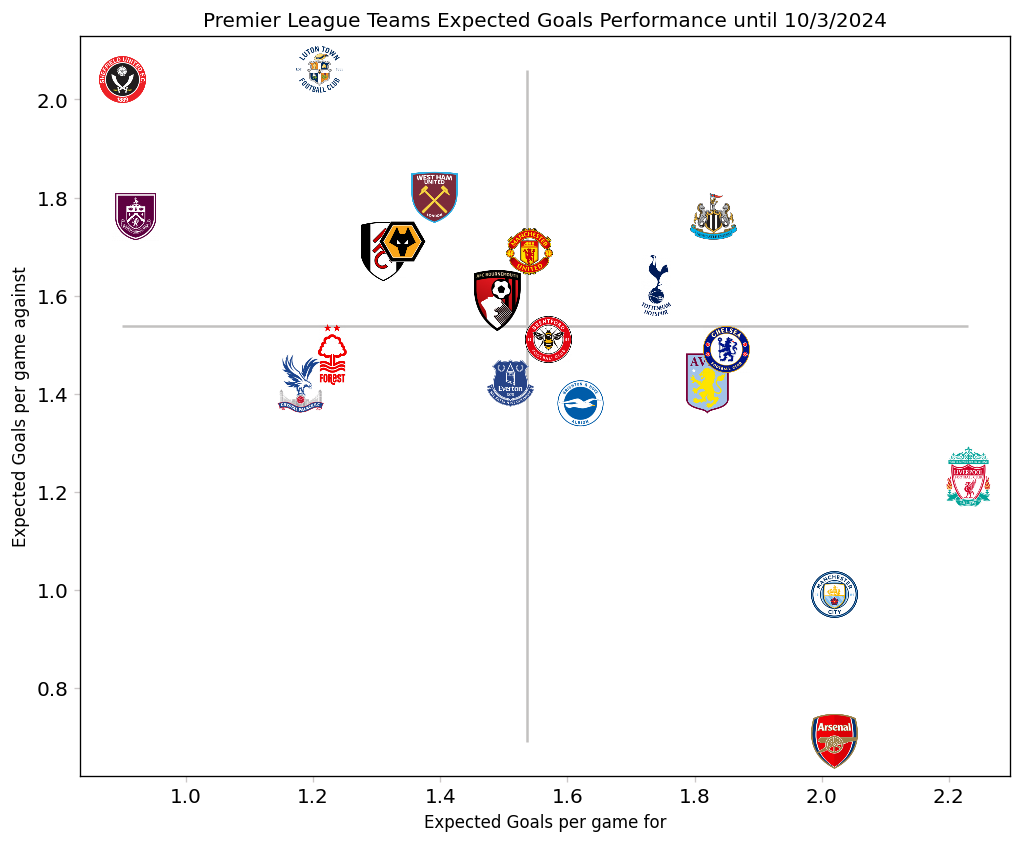

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Create initial plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
ax.scatter(data['xG'], data['xGA'], color='white')
# Add axis labels and title
ax.set_xlabel('Expected Goals per game for')  # Set x-axis label
ax.set_ylabel('Expected Goals per game against')  # Set y-axis label
ax.set_title('Premier League Teams Expected Goals Performance until 10/3/2024')  # Set plot title

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread('/content/drive/MyDrive/pl_logos/' + path), zoom=.2, alpha = 1)

for index, row in data.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(data['xGA'].mean(), data['xG'].min(), data['xG'].max(), color='#c2c1c0')
plt.vlines(data['xG'].mean(), data['xGA'].min(), data['xGA'].max(), color='#c2c1c0')

# Show the plot
plt.show()
## Save plot
#plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

# Expected Goals Difference Analysis


In [18]:
# Create the 'xgdiff' column by subtracting 'xGA' from 'xG'
data['xGDiff'] = data['xG'] - data['xGA']

# Display the updated DataFrame
data

,Squad,xG,xAG,xG+xAG,npxG,npxG+xAG,path,xGA,xGDiff
0,Arsenal,2.02,1.41,3.43,1.80,3.21,Arsenal.png,0.69,1.33
1,Aston Villa,1.82,1.34,3.17,1.71,3.06,Aston Villa.png,1.42,0.40
2,Bournemouth,1.49,1.07,2.56,1.43,2.51,Bournemouth.png,1.59,-0.10
3,Brentford,1.57,1.09,2.66,1.49,2.58,Brentford.png,1.51,0.06
4,Brighton,1.62,1.19,2.81,1.49,2.68,Brighton.png,1.38,0.24
5,Burnley,0.92,0.69,1.61,0.89,1.58,Burnley.png,1.76,-0.84
6,Chelsea,1.85,1.27,3.12,1.62,2.89,Chelsea.png,1.49,0.36
7,Crystal Palace,1.18,0.92,2.10,1.07,1.98,Crystal Palace.png,1.42,-0.24
8,Everton,1.51,1.09,2.60,1.48,2.57,Everton.png,1.42,0.09
9,Fulham,1.31,0.97,2.27,1.25,2.22,Fulham.png,1.69,-0.38


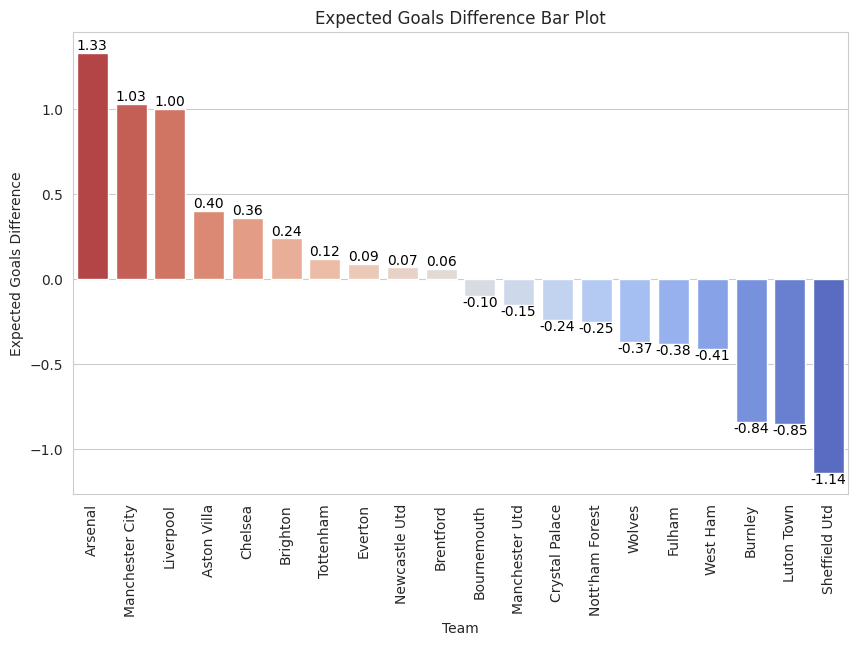

In [19]:
import seaborn as sns

# Sort the DataFrame by the 'xGDiff' column in descending order
data_sorted = data.sort_values(by='xGDiff', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot with reversed coolwarm palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Squad', y='xGDiff', data=data_sorted, palette="coolwarm_r")

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Expected Goals Difference')
plt.title('Expected Goals Difference Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations for xGDiff values outside the bars
for i, val in enumerate(data_sorted['xGDiff']):
    ax.text(i, val, f"{val:.2f}", color='black', ha='center', va='bottom' if val > 0 else 'top')

plt.show()

In [20]:
# Use pandas to read in the data
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats#all_rank_key', attrs={'id': "results2023-202491_home_away" })[0]
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Home                             ...  \
                   Rk              Squad   MP   W  D   L  GF  GA  GD Pts  ...   
0                   1            Arsenal   14  11  2   1  36  13  23  35  ...   
1                   2          Liverpool   14  11  3   0  38  12  26  36  ...   
2                   3    Manchester City   14  10  4   0  34  12  22  34  ...   
3                   4        Aston Villa   14  10  1   3  35  19  16  31  ...   
4                   5          Tottenham   14  10  0   4  29  19  10  30  ...   
5                   6     Manchester Utd   14   8  1   5  21  20   1  25  ...   
6                   7           West Ham   14   6  5   3  24  21   3  23  ...   
7                   8           Brighton   14   7  6   1  28  16  12  27  ...   
8                   9             Wolves   14   7  3   4  22  21   1  24  ...   
9                  10      Newcastle Utd   14   9  2   3  34  16  18  29  ...   
10                 11            Chelsea   13   6  3   4  23  20   3  21  ...   
11                 12             Fulham   14   8  1   5  26  15  11  25  ...   
12                 13        Bournemouth   13   3  5   5  15  21  -6  14  ...   
13                 14     Crystal Palace   14   4  4   6  19  20  -1  16  ...   
14                 15          Brentford   14   4  4   6  24  29  -5  16  ...   
15                 16            Everton   14   3  4   7  15  18  -3  13  ...   
16                 17    Nott'ham Forest   14   4  3   7  19  21  -2  15  ...   
17                 18         Luton Town   14   3  2   9  21  25  -4  11  ...   
18                 19            Burnley   14   1  2  11  13  34 -21   5  ...   
19                 20      Sheffield Utd   14   2  2  10  12  42 -30   8  ...   

   Away                                                  
      L  GF  GA  GD Pts Pts/MP    xG   xGA   xGD xGD/90  
0     3  34  11  23  29   2.07  24.9   9.9  15.0   1.07  
1     2  27  14  13  28   2.00  22.9  21.6   1.3   0.09  
2     3  29  16  13  29   2.07  30.1  16.2  13.9   0.99  
3     4  24  22   2  24   1.71  21.1  21.6  -0.6  -0.04  
4     2  30  20  10  23   1.77  18.8  20.7  -1.9  -0.14  
5     6  18  19  -1  22   1.57  19.2  26.1  -6.9  -0.49  
6     6  21  28  -7  20   1.43  21.0  27.5  -6.5  -0.46  
7     7  22  28  -6  15   1.07  20.0  20.9  -0.9  -0.07  
8     7  20  23  -3  17   1.21  19.3  24.8  -5.5  -0.40  
9     9  25  32  -7  11   0.79  19.3  30.6 -11.3  -0.81  
10    6  24  25  -1  18   1.29  23.6  24.6  -0.9  -0.07  
11    8  14  29 -15  10   0.71  14.6  28.2 -13.6  -0.97  
12    6  23  29  -6  18   1.29  21.8  25.0  -3.2  -0.23  
13    7  14  28 -14  13   0.93  14.3  23.8  -9.5  -0.68  
14   10  16  23  -7  10   0.71  19.7  19.9  -0.2  -0.01  
15    6  14  21  -7  18   1.29  15.9  22.2  -6.3  -0.45  
16    9  15  29 -14   9   0.64  17.4  25.6  -8.3  -0.59  
17    7  18  31 -13  10   0.77  12.4  32.3 -20.0  -1.54  
18    9  14  28 -14   9   0.64  11.1  28.3 -17.2  -1.23  
19   10  12  32 -20   6   0.43   9.8  27.6 -17.9  -1.28  

[20 rows x 28 columns]

In [21]:
df.columns = df.columns.droplevel()

In [22]:
print(df.columns)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'],
      dtype='object')


# Home Games Analysis

In [23]:
df_home = df.iloc[:, 1:15]
df_home

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,Arsenal,14,11,2,1,36,13,23,35,2.50,31.7,9.5,22.2,1.58
1,Liverpool,14,11,3,0,38,12,26,36,2.57,39.7,12.9,26.8,1.91
2,Manchester City,14,10,4,0,34,12,22,34,2.43,26.5,11.3,15.1,1.08
3,Aston Villa,14,10,1,3,35,19,16,31,2.21,29.9,18.2,11.7,0.84
4,Tottenham,14,10,0,4,29,19,10,30,2.14,28.2,23.1,5.0,0.36
5,Manchester Utd,14,8,1,5,21,20,1,25,1.79,24.1,21.4,2.7,0.19
6,West Ham,14,6,5,3,24,21,3,23,1.64,18.0,22.8,-4.8,-0.34
7,Brighton,14,7,6,1,28,16,12,27,1.93,25.5,17.8,7.7,0.55
8,Wolves,14,7,3,4,22,21,1,24,1.71,18.3,23.1,-4.8,-0.34
9,Newcastle Utd,14,9,2,3,34,16,18,29,2.07,31.8,18.6,13.2,0.95


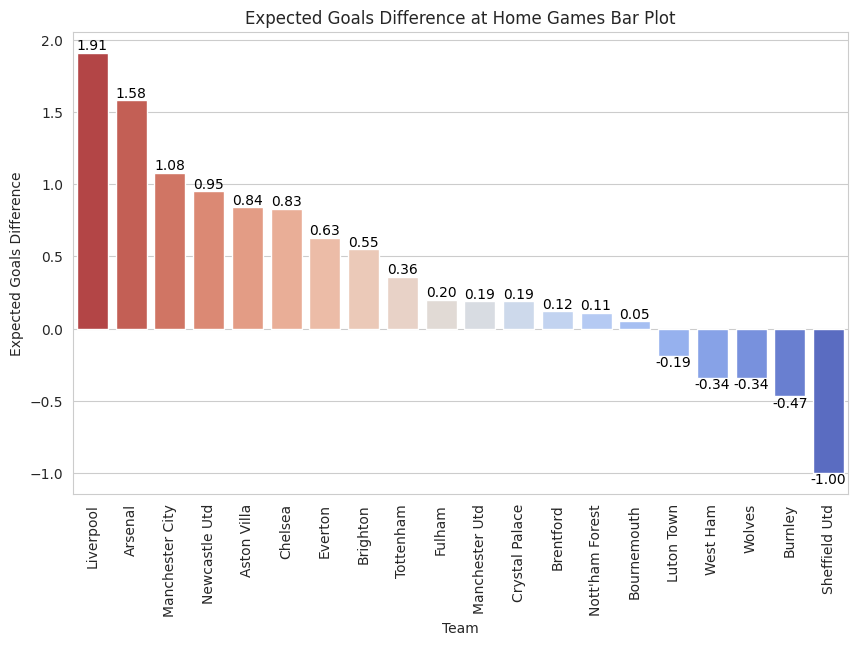

In [24]:
# Sort the DataFrame by the 'xGDiff' column in descending order
df_home_sorted = df_home.sort_values(by='xGD/90', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot with reversed coolwarm palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Squad', y='xGD/90', data=df_home_sorted, palette="coolwarm_r")

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Expected Goals Difference')
plt.title('Expected Goals Difference at Home Games Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations for xGDiff values outside the bars
for i, val in enumerate(df_home_sorted['xGD/90']):
    ax.text(i, val, f"{val:.2f}", color='black', ha='center', va='bottom' if val > 0 else 'top')

plt.show()

# Away Games Analysis

In [25]:
df_away = df.iloc[:, [1] + list(range(15, len(df.columns)))]
df_away

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,Arsenal,14,9,2,3,34,11,23,29,2.07,24.9,9.9,15.0,1.07
1,Liverpool,14,8,4,2,27,14,13,28,2.00,22.9,21.6,1.3,0.09
2,Manchester City,14,9,2,3,29,16,13,29,2.07,30.1,16.2,13.9,0.99
3,Aston Villa,14,7,3,4,24,22,2,24,1.71,21.1,21.6,-0.6,-0.04
4,Tottenham,13,6,5,2,30,20,10,23,1.77,18.8,20.7,-1.9,-0.14
5,Manchester Utd,14,7,1,6,18,19,-1,22,1.57,19.2,26.1,-6.9,-0.49
6,West Ham,14,6,2,6,21,28,-7,20,1.43,21.0,27.5,-6.5,-0.46
7,Brighton,14,4,3,7,22,28,-6,15,1.07,20.0,20.9,-0.9,-0.07
8,Wolves,14,5,2,7,20,23,-3,17,1.21,19.3,24.8,-5.5,-0.40
9,Newcastle Utd,14,3,2,9,25,32,-7,11,0.79,19.3,30.6,-11.3,-0.81


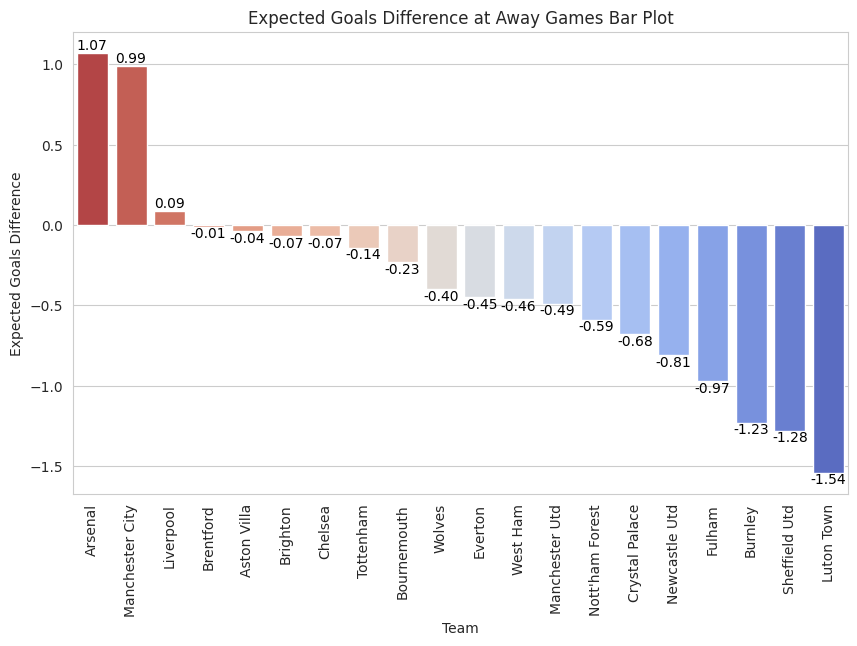

In [26]:
# Sort the DataFrame by the 'xGDiff' column in descending order
df_away_sorted = df_away.sort_values(by='xGD/90', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot with reversed coolwarm palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Squad', y='xGD/90', data=df_away_sorted, palette="coolwarm_r")

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Expected Goals Difference')
plt.title('Expected Goals Difference at Away Games Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations for xGDiff values outside the bars
for i, val in enumerate(df_away_sorted['xGD/90']):
    ax.text(i, val, f"{val:.2f}", color='black', ha='center', va='bottom' if val > 0 else 'top')

plt.show()

In [27]:
liv = pd.read_html('https://fbref.com/en/squads/822bd0ba/2023-2024/c9/Liverpool-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]
ars = pd.read_html('https://fbref.com/en/squads/18bb7c10/2023-2024/c9/Arsenal-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]
mc = pd.read_html('https://fbref.com/en/squads/b8fd03ef/2023-2024/c9/Manchester-City-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]
tot = pd.read_html('https://fbref.com/en/squads/361ca564/2023-2024/c9/Tottenham-Hotspur-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]
mu = pd.read_html('https://fbref.com/en/squads/19538871/2023-2024/c9/Manchester-United-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]
che = pd.read_html('https://fbref.com/en/squads/cff3d9bb/2023-2024/c9/Chelsea-Stats-Premier-League', attrs={'id':"matchlogs_for" })[0]

In [28]:
liv

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023-08-13,16:30,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,Virgil van Dijk,4-3-3,Anthony Taylor,Match Report,NaN
1,2023-08-19,15:00,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,64.0,53145.0,Virgil van Dijk,4-3-3,Thomas Bramall,Match Report,NaN
2,2023-08-27,16:30,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,52214.0,Virgil van Dijk,4-3-3,John Brooks,Match Report,NaN
3,2023-09-03,14:00,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,63.0,50109.0,Trent Alexander-Arnold,4-3-3,Simon Hooper,Match Report,NaN
4,2023-09-16,12:30,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,65.0,31257.0,Andrew Robertson,4-3-3,Michael Oliver,Match Report,NaN
5,2023-09-24,14:00,Matchweek 6,Sun,Home,W,3.0,1.0,West Ham,3.0,1.1,63.0,50136.0,Virgil van Dijk,4-3-3,Chris Kavanagh,Match Report,NaN
6,2023-09-30,17:30,Matchweek 7,Sat,Away,L,1.0,2.0,Tottenham,1.3,2.2,36.0,62001.0,Virgil van Dijk,4-3-3,Simon Hooper,Match Report,NaN
7,2023-10-08,14:00,Matchweek 8,Sun,Away,D,2.0,2.0,Brighton,2.3,2.3,54.0,31752.0,Virgil van Dijk,4-3-3,Anthony Taylor,Match Report,NaN
8,2023-10-21,12:30,Matchweek 9,Sat,Home,W,2.0,0.0,Everton,2.2,0.1,77.0,50201.0,Virgil van Dijk,4-3-3,Craig Pawson,Match Report,NaN
9,2023-10-29,14:00,Matchweek 10,Sun,Home,W,3.0,0.0,Nott'ham Forest,3.2,0.4,72.0,50143.0,Virgil van Dijk,4-3-3,Chris Kavanagh,Match Report,NaN


In [29]:
columns = ['better', 'equivalent', 'worse']
big6 = pd.DataFrame(columns=columns)

In [30]:
def update_big6_stats(df):
    # Remove the last 10 rows from the DataFrame
    df = df.drop(df.tail(10).index)

    # Calculate xGD
    df['xGD'] = df['xG'] - df['xGA']

    # Initialize counters
    better = 0
    equivalent = 0
    worse = 0

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        xGD = row['xGD']
        if xGD >= 0.5:
            better += 1
        elif xGD <= -0.5:
            worse += 1
        else:
            equivalent += 1

    # Create a DataFrame to store the counts
    temp = pd.DataFrame({'better': [better],
                         'equivalent': [equivalent],
                         'worse': [worse]})

    # Concatenate with big6 DataFrame
    res = pd.concat([big6, temp], ignore_index=True)

    return res

In [31]:
big6 = update_big6_stats(liv)
big6 = update_big6_stats(ars)
big6 = update_big6_stats(mc)
big6 = update_big6_stats(tot)
big6 = update_big6_stats(mu)
big6 = update_big6_stats(che)

In [32]:
big6

,better,equivalent,worse
0,18,5,5
1,20,8,0
2,20,6,2
3,13,9,6
4,7,12,9
5,14,9,5


In [33]:
team_names = ['Liverpool', 'Arsenal', 'Manchester City', 'Tottenham', 'Manchester United', 'Chelsea']
big6.insert(0, 'team', team_names)

In [34]:
big6

,team,better,equivalent,worse
0,Liverpool,18,5,5
1,Arsenal,20,8,0
2,Manchester City,20,6,2
3,Tottenham,13,9,6
4,Manchester United,7,12,9
5,Chelsea,14,9,5


In [35]:
def add_xGD_column(df):
    # Create the 'xGD' column
    df['xGD'] = df['xG'] - df['xGA']
    return df

In [36]:
liv = add_xGD_column(liv)
ars = add_xGD_column(ars)
mc = add_xGD_column(mc)
tot = add_xGD_column(tot)
mu = add_xGD_column(mu)
che = add_xGD_column(che)

In [37]:
cols = ['M', 'W', 'L', 'D']
better_df = pd.DataFrame(columns=columns)
worse_df = pd.DataFrame(columns=columns)
equivalent_df = pd.DataFrame(columns=columns)

In [38]:
def create_better_df(dfs):
    results = []  # List to store results for each DataFrame

    for df in dfs:
        # Initialize variables for each DataFrame
        wins = 0
        losses = 0
        draws = 0

        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            xGD = row['xGD']
            result = row['Result']

            # Analyze the result based on xGD
            if xGD >= 0.5:
                if result == 'W':
                    wins += 1
                elif result == 'L':
                    losses += 1
                else:
                    draws += 1

        # Append results for the current DataFrame to the list
        results.append({'matches': wins + losses + draws,
                        'Won': wins,
                        'Lost': losses,
                        'Drew': draws})

    # Create a DataFrame to store the analysis results
    res = pd.DataFrame(results)

    return res

# Example usage:
# Assuming dfs is a list of DataFrames
# Call the function to analyze 'xGD' column for each DataFrame and create 'res' DataFrame
better_df = create_better_df([liv, ars, mc, tot, mu, che])


In [39]:
better_df.insert(0, 'team', team_names)

In [40]:
better_df

,team,matches,Won,Lost,Drew
0,Liverpool,18,15,0,3
1,Arsenal,20,17,2,1
2,Manchester City,20,16,1,3
3,Tottenham,13,12,1,0
4,Manchester United,7,6,1,0
5,Chelsea,14,10,3,1


In [41]:
def create_worse_df(dfs):
    results = []  # List to store results for each DataFrame

    for df in dfs:
        # Initialize variables for each DataFrame
        wins = 0
        losses = 0
        draws = 0

        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            xGD = row['xGD']
            result = row['Result']

            # Analyze the result based on xGD
            if xGD <= -0.5:
                if result == 'W':
                    wins += 1
                elif result == 'L':
                    losses += 1
                else:
                    draws += 1

        # Append results for the current DataFrame to the list
        results.append({'matches': wins + losses + draws,
                        'Won': wins,
                        'Lost': losses,
                        'Drew': draws})

    # Create a DataFrame to store the analysis results
    res = pd.DataFrame(results)

    return res

In [42]:
worse_df = create_worse_df([liv, ars, mc, tot, mu, che])
worse_df.insert(0, 'team', team_names)
worse_df

,team,matches,Won,Lost,Drew
0,Liverpool,5,2,2,1
1,Arsenal,0,0,0,0
2,Manchester City,2,0,1,1
3,Tottenham,6,0,3,3
4,Manchester United,9,3,5,1
5,Chelsea,5,1,3,1


In [43]:
def create_equivalent_df(dfs):
    results = []  # List to store results for each DataFrame

    for df in dfs:
        # Initialize variables for each DataFrame
        wins = 0
        losses = 0
        draws = 0

        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            xGD = row['xGD']
            result = row['Result']

            # Analyze the result based on xGD
            if xGD > -0.5 and xGD < 0.5:
                if result == 'W':
                    wins += 1
                elif result == 'L':
                    losses += 1
                else:
                    draws += 1

        # Append results for the current DataFrame to the list
        results.append({'matches': wins + losses + draws,
                        'Won': wins,
                        'Lost': losses,
                        'Drew': draws})

    # Create a DataFrame to store the analysis results
    res = pd.DataFrame(results)

    return res

In [44]:
equivalent_df = create_equivalent_df([liv, ars, mc, tot, mu, che])
equivalent_df.insert(0, 'team', team_names)
equivalent_df

,team,matches,Won,Lost,Drew
0,Liverpool,5,2,0,3
1,Arsenal,8,3,2,3
2,Manchester City,6,3,1,2
3,Tottenham,8,4,2,2
4,Manchester United,12,6,5,1
5,Chelsea,8,0,4,4


In [45]:
def winRate_pointsLost(df):
    # Calculate win rate
    df['win_rate'] = (df['Won'] / df['matches']) * 100
    df['win_rate'] = df['win_rate'].round(1).astype(str) + '%'
    # Calculate points lost
    df['points_lost'] = df['Lost'] * 3 + df['Drew'] * 2

    return df

better_df = winRate_pointsLost(better_df)
equivalent_df = winRate_pointsLost(equivalent_df)
worse_df = winRate_pointsLost(worse_df)

In [46]:
better_df

,team,matches,Won,Lost,Drew,win_rate,points_lost
0,Liverpool,18,15,0,3,83.3%,6
1,Arsenal,20,17,2,1,85.0%,8
2,Manchester City,20,16,1,3,80.0%,9
3,Tottenham,13,12,1,0,92.3%,3
4,Manchester United,7,6,1,0,85.7%,3
5,Chelsea,14,10,3,1,71.4%,11


In [47]:
worse_df

,team,matches,Won,Lost,Drew,win_rate,points_lost
0,Liverpool,5,2,2,1,40.0%,8
1,Arsenal,0,0,0,0,nan%,0
2,Manchester City,2,0,1,1,0.0%,5
3,Tottenham,6,0,3,3,0.0%,15
4,Manchester United,9,3,5,1,33.3%,17
5,Chelsea,5,1,3,1,20.0%,11


In [48]:
equivalent_df

,team,matches,Won,Lost,Drew,win_rate,points_lost
0,Liverpool,5,2,0,3,40.0%,6
1,Arsenal,8,3,2,3,37.5%,12
2,Manchester City,6,3,1,2,50.0%,7
3,Tottenham,8,4,2,2,50.0%,10
4,Manchester United,12,6,5,1,50.0%,17
5,Chelsea,8,0,4,4,0.0%,20


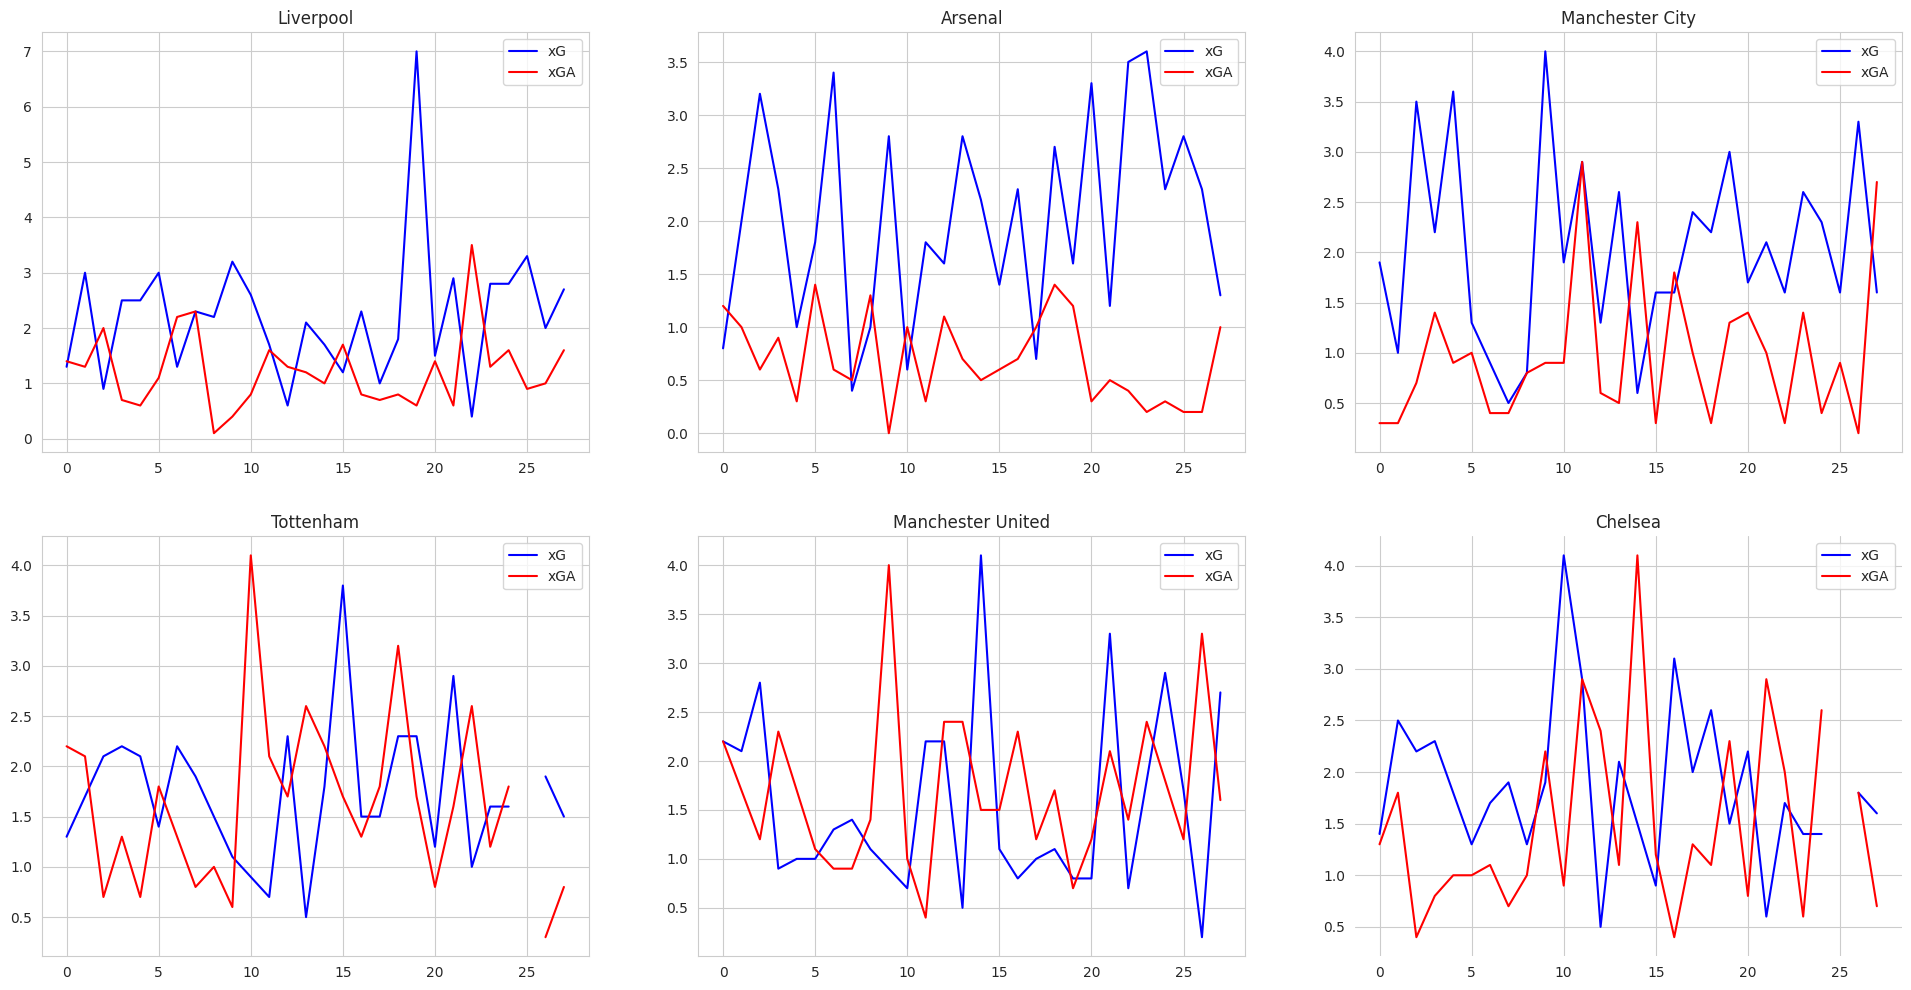

In [49]:
# Set up the figure with subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Plot dataframes on the subplots
plot_titles = ['Liverpool', 'Arsenal', 'Manchester City', 'Tottenham', 'Manchester United', 'Chelsea']
for i, df in enumerate([liv, ars, mc, tot, mu, che]):
    row = i // 3
    col = i % 3
    ax[row, col].plot(df['xG'], label='xG', color='blue')
    ax[row, col].plot(df['xGA'], label='xGA', color='red')
    ax[row, col].set_title(plot_titles[i])
    ax[row, col].legend()

# Turn off the spines for a cleaner look
for spine in ax[-1, -1].spines.values():
    spine.set_visible(False)

plt.show()

In [68]:
possession = pd.read_html('https://fbref.com/en/comps/9/possession/Premier-League-Stats#all_stats_possession', attrs={'id': "stats_squads_possession_for" })[0]
possession

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl               Poss   
0             Arsenal                 25               61.5   
1         Aston Villa                 28               54.7   
2         Bournemouth                 27               44.4   
3           Brentford                 28               44.4   
4            Brighton                 27               62.3   
5             Burnley                 30               46.2   
6             Chelsea                 30               58.2   
7      Crystal Palace                 26               41.9   
8             Everton                 25               40.1   
9              Fulham                 25               50.0   
10          Liverpool                 29               60.2   
11         Luton Town                 25               41.7   
12    Manchester City                 25               65.0   
13     Manchester Utd                 30               50.4   
14      Newcastle Utd                 32               52.9   
15    Nott'ham Forest                 33               40.2   
16      Sheffield Utd                 33               35.7   
17          Tottenham                 28               60.7   
18           West Ham                 24               41.8   
19             Wolves                 25               47.9   

   Unnamed: 3_level_0 Touches                                          ...  \
                  90s Touches Def Pen Def 3rd Mid 3rd Att 3rd Att Pen  ...   
0                28.0   20356    1370    4957    8896    6634    1071  ...   
1                28.0   17373    1947    5847    7501    4188     797  ...   
2                27.0   14902    1776    4867    6162    4054     741  ...   
3                28.0   15615    2176    5965    6095    3680     696  ...   
4                28.0   22336    2330    6951   10353    5174     836  ...   
5                28.0   16112    2139    6047    6684    3519     533  ...   
6                27.0   19594    2113    6528    8525    4734     724  ...   
7                28.0   15410    1782    5408    6477    3679     571  ...   
8                28.0   14709    1811    4912    6033    3912     611  ...   
9                28.0   17942    1935    6222    7836    4063     587  ...   
10               28.0   20744    1690    5600    9913    5422     942  ...   
11               27.0   13962    1825    4917    5574    3656     592  ...   
12               28.0   22919    1613    5209   10399    7460    1033  ...   
13               28.0   17564    2124    5982    7118    4613     756  ...   
14               28.0   17968    1837    6056    7767    4314     750  ...   
15               28.0   14753    1903    5535    6040    3334     552  ...   
16               28.0   13228    2096    5362    5201    2790     474  ...   
17               27.0   20287    2057    6247    8675    5557     939  ...   
18               28.0   15627    1913    5441    6890    3456     562  ...   
19               28.0   17076    2010    6121    7399    3768     583  ...   

   Carries                                          Receiving        
   Carries TotDist PrgDist PrgC  1/3  CPA  Mis  Dis       Rec  PrgR  
0    12800   62371   32056  628  432  232  382  278     14756  1624  
1    10967   60175   31930  600  378  173  356  316     11937  1132  
2     7968   47412   24626  490  375  156  445  287      8550   945  
3     7945   40562   20849  346  243  110  399  194      9195   932  
4    14767   71577   37735  637  422  210  423  269     16728  1393  
5     9024   48353   24976  486  312  156  361  216      9941   800  
6    11916   59725   31052  594  391  186  444  277     13975  1135  
7     8005   40613   19962  364  271  119  441  321      9169   814  
8     7312   39254   19671  380  304   95  417  245      8252   841  
9    10421   55062   27710  467  368   98  380  244     11934  1049  
10   12808   66352   34679  658  514  205  436  290     144

In [69]:
possession.columns = possession.columns.droplevel()
possession

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,Arsenal,25,61.5,28.0,20356,1370,4957,8896,6634,1071,...,12800,62371,32056,628,432,232,382,278,14756,1624
1,Aston Villa,28,54.7,28.0,17373,1947,5847,7501,4188,797,...,10967,60175,31930,600,378,173,356,316,11937,1132
2,Bournemouth,27,44.4,27.0,14902,1776,4867,6162,4054,741,...,7968,47412,24626,490,375,156,445,287,8550,945
3,Brentford,28,44.4,28.0,15615,2176,5965,6095,3680,696,...,7945,40562,20849,346,243,110,399,194,9195,932
4,Brighton,27,62.3,28.0,22336,2330,6951,10353,5174,836,...,14767,71577,37735,637,422,210,423,269,16728,1393
5,Burnley,30,46.2,28.0,16112,2139,6047,6684,3519,533,...,9024,48353,24976,486,312,156,361,216,9941,800
6,Chelsea,30,58.2,27.0,19594,2113,6528,8525,4734,724,...,11916,59725,31052,594,391,186,444,277,13975,1135
7,Crystal Palace,26,41.9,28.0,15410,1782,5408,6477,3679,571,...,8005,40613,19962,364,271,119,441,321,9169,814
8,Everton,25,40.1,28.0,14709,1811,4912,6033,3912,611,...,7312,39254,19671,380,304,95,417,245,8252,841
9,Fulham,25,50.0,28.0,17942,1935,6222,7836,4063,587,...,10421,55062,27710,467,368,98,380,244,11934,1049


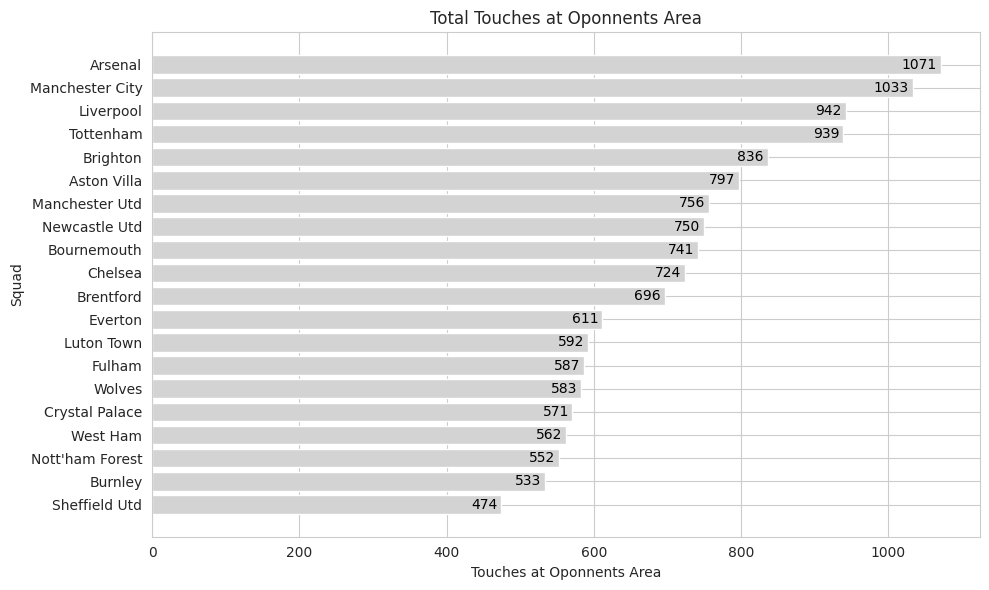

In [76]:
# Sort DataFrame by 'Att 3rd' column in descending order
poss = possession.sort_values(by='Att Pen', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
bars = plt.barh(poss['Squad'], poss['Att Pen'], color='lightgrey')  # Change color here
plt.ylabel('Squad')
plt.xlabel('Touches at Oponnents Area')
plt.title('Total Touches at Oponnents Area')
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Annotate bars with their values inside the bars
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', color='black')

plt.show()

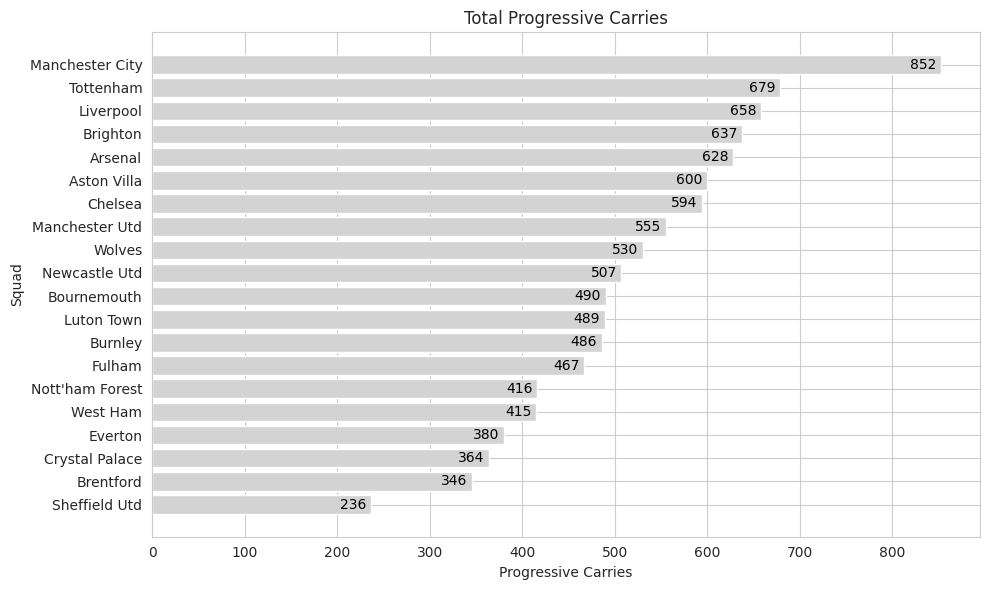

In [73]:
# Sort DataFrame by 'Att 3rd' column in descending order
poss = possession.sort_values(by='PrgC', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
bars = plt.barh(poss['Squad'], poss['PrgC'], color='lightgrey')  # Change color here
plt.ylabel('Squad')
plt.xlabel('Progressive Carries')
plt.title('Total Progressive Carries')
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Annotate bars with their values inside the bars
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', color='black')

plt.show()

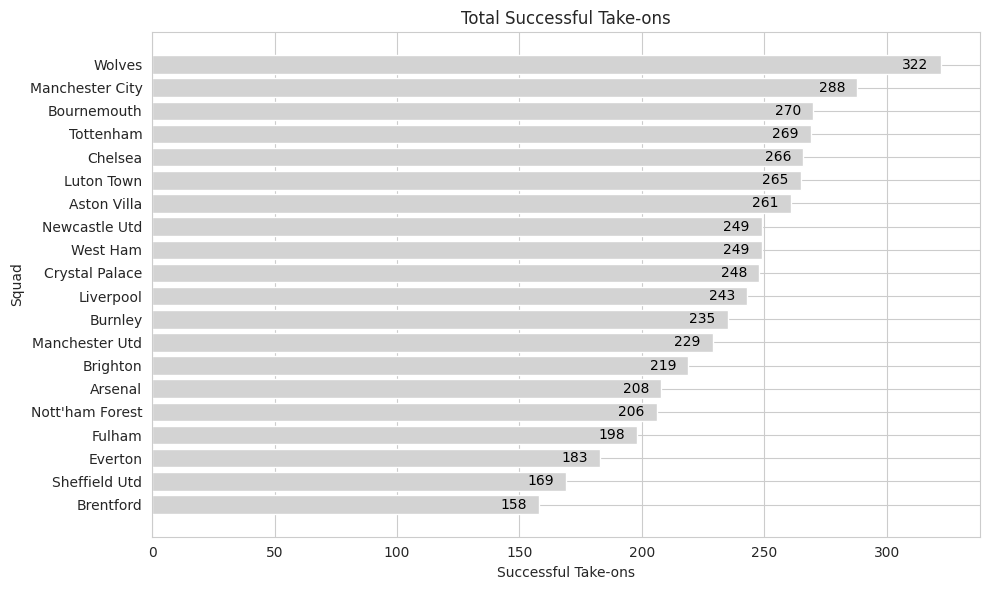

In [74]:
# Sort DataFrame by 'Att 3rd' column in descending order
poss = possession.sort_values(by='Succ', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
bars = plt.barh(poss['Squad'], poss['Succ'], color='lightgrey')  # Change color here
plt.ylabel('Squad')
plt.xlabel('Successful Take-ons')
plt.title('Total Successful Take-ons')
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Annotate bars with their values inside the bars
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', color='black')

plt.show()

In [111]:
passing = pd.read_html('https://fbref.com/en/comps/9/passing/Premier-League-Stats', attrs={'id': "stats_squads_passing_for" })[0]
passing

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  Total         \
                Squad               # Pl                90s    Cmp    Att   
0             Arsenal                 25               28.0  14894  17520   
1         Aston Villa                 28               28.0  12177  14590   
2         Bournemouth                 27               27.0   8631  11509   
3           Brentford                 28               28.0   9295  12405   
4            Brighton                 27               28.0  16906  19333   
5             Burnley                 30               28.0  10052  13046   
6             Chelsea                 30               27.0  14071  16502   
7      Crystal Palace                 26               28.0   9255  12065   
8             Everton                 25               28.0   8327  11380   
9              Fulham                 25               28.0  12034  14901   
10          Liverpool                 29               28.0  14523  17500   
11         Luton Town                 25               27.0   7689  10643   
12    Manchester City                 25               28.0  17798  20175   
13     Manchester Utd                 30               28.0  11551  14358   
14      Newcastle Utd                 32               28.0  12218  14936   
15    Nott'ham Forest                 33               28.0   8574  11397   
16      Sheffield Utd                 33               28.0   6914   9895   
17          Tottenham                 28               27.0  14567  17073   
18           West Ham                 24               28.0   9409  12299   
19             Wolves                 25               28.0  11074  13860   

                         Short        ...  Long Unnamed: 17_level_0  \
    Cmp% TotDist PrgDist   Cmp   Att  ...  Cmp%                 Ast   
0   85.0  243541   77737  7414  8116  ...  55.1                  47   
1   83.5  212575   71827  5341  5939  ...  57.5                  41   
2   75.0  159003   59285  3616  4250  ...  47.4                  27   
3   74.9  167180   64207  4125  4875  ...  49.3                  24   
4   87.4  265781   87288  8845  9541  ...  62.0                  35   
5   77.1  176717   59154  4532  5233  ...  45.9                  20   
6   85.3  231694   77457  6991  7620  ...  59.4                  33   
7   76.7  165308   62428  4193  4846  ...  46.9                  24   
8   73.2  154109   65690  3756  4405  ...  48.8                  14   
9   80.8  214049   72568  5258  5909  ...  56.3                  28   
10  83.0  248995   85836  6769  7508  ...  57.5                  48   
11  72.2  140131   56975  3456  4051  ...  43.9                  23   
12  88.2  289681   82808  9052  9650  ...  65.9                  47   
13  80.4  193411   66785  5614  6339  ...  55.2                  26   
14  81.8  209308   71950  5765  6441  ...  56.2                  38   
15  75.2  151438   59659  3970  4638  ...  50.6                  29   
16  69.9  122596   51501  3301  3939  ...  39.0                  10   
17  85.3  231089   79537  7458  8146  ...  57.7                  47   
18  76.5  163251   63641  4533  5138  ...  47.5                  31   
19  79.9  183761   61829  5521  6188  ...  48.4                  32   

   Unnamed: 18_level_0 Expected       Unnamed: 21_level_0 Unnamed: 22_level_0  \
                   xAG       xA A-xAG                  KP                 1/3   
0                 39.4     42.3   7.6                 367                1233   
1                 37.6     34.3   3.4                 315                 898   
2                 29.0     25.0  -2.0                 283                 769   
3                 30.6     29.1  -6.6                 234                 705   
4                 33.3     33.5   1.7                 324                1168   
5                 19.4     16.9   0.6                 219                 650   
6                 34.2     30.3  -1.2                 262                 970   
7               

In [112]:
passing.columns = passing.columns.droplevel()

In [113]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.1, 1))
# Normalize the specified columns
passing[['xAG', 'KP', 'PPA']] = scaler.fit_transform(passing[['xAG', 'KP', 'PPA']])
passing[['xAG', 'KP', 'PPA']] = (passing[['xAG', 'KP', 'PPA']] * 100).round(2)
passing

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,...,Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,Arsenal,25,28.0,14894,17520,85.0,243541,77737,7414,8116,...,55.1,47,82.00,42.3,7.6,83.03,1233,100.00,55,1638
1,Aston Villa,28,28.0,12177,14590,83.5,212575,71827,5341,5939,...,57.5,41,76.69,34.3,3.4,63.85,898,59.25,55,1142
2,Bournemouth,27,27.0,8631,11509,75.0,159003,59285,3616,4250,...,47.4,27,51.31,25.0,-2.0,52.05,769,50.75,63,957
3,Brentford,28,28.0,9295,12405,74.9,167180,64207,4125,4875,...,49.3,24,56.03,29.1,-6.6,33.98,705,42.60,75,933
4,Brighton,27,28.0,16906,19333,87.4,265781,87288,8845,9541,...,62.0,35,64.00,33.5,1.7,67.17,1168,64.34,59,1402
5,Burnley,30,28.0,10052,13046,77.1,176717,59154,4532,5233,...,45.9,20,22.98,16.9,0.6,28.44,650,10.00,30,813
6,Chelsea,30,27.0,14071,16502,85.3,231694,77457,6991,7620,...,59.4,33,66.66,30.3,-1.2,44.30,970,52.45,38,1148
7,Crystal Palace,26,28.0,9255,12065,76.7,165308,62428,4193,4846,...,46.9,24,41.28,21.9,-1.6,41.72,735,28.68,45,828
8,Everton,25,28.0,8327,11380,73.2,154109,65690,3756,4405,...,48.8,14,55.74,22.8,-16.5,45.78,694,38.87,67,849
9,Fulham,25,28.0,12034,14901,80.8,214049,72568,5258,5909,...,56.3,28,45.70,23.6,0.9,46.89,813,48.38,67,1059


In [115]:
passing['path'] = passing['Squad'] + '.png'

In [116]:
passing.head()

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,path
0,Arsenal,25,28.0,14894,17520,85.0,243541,77737,7414,8116,...,47,82.00,42.3,7.6,83.03,1233,100.00,55,1638,Arsenal.png
1,Aston Villa,28,28.0,12177,14590,83.5,212575,71827,5341,5939,...,41,76.69,34.3,3.4,63.85,898,59.25,55,1142,Aston Villa.png
2,Bournemouth,27,27.0,8631,11509,75.0,159003,59285,3616,4250,...,27,51.31,25.0,-2.0,52.05,769,50.75,63,957,Bournemouth.png
3,Brentford,28,28.0,9295,12405,74.9,167180,64207,4125,4875,...,24,56.03,29.1,-6.6,33.98,705,42.60,75,933,Brentford.png
4,Brighton,27,28.0,16906,19333,87.4,265781,87288,8845,9541,...,35,64.00,33.5,1.7,67.17,1168,64.34,59,1402,Brighton.png


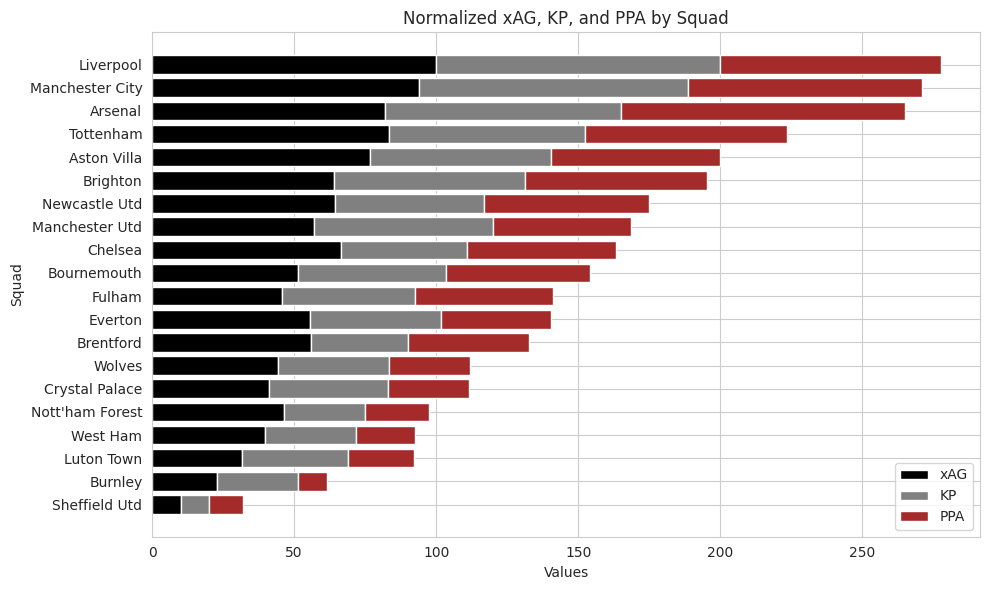

In [110]:
# Calculate the sum of 'xAG', 'KP', and 'PPA' columns and sort by it
passing['Sum'] = passing[['xAG', 'KP', 'PPA']].sum(axis=1)
passing.sort_values(by='Sum', ascending=True, inplace=True)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(passing['Squad'], passing['xAG'], color='black', label='xAG')
plt.barh(passing['Squad'], passing['KP'], left=passing['xAG'], color='grey', label='KP')
plt.barh(passing['Squad'], passing['PPA'], left=passing['xAG'] + passing['KP'], color='brown', label='PPA')
plt.xlabel('Values')
plt.ylabel('Squad')
plt.title('Normalized xAG, KP, and PPA by Squad')
plt.legend()
plt.tight_layout()
plt.show()